In [2]:
import pandas as pd
from scipy.stats import rankdata
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [3]:
merged_df = pd.read_csv('./data-analytics/datasets/merged_zone_sector_counts.csv')


In [4]:
demo_df = pd.read_csv('./data-analytics/datasets/demographic_scores_and_ranks.csv')

In [5]:
merged_df.head()

,zone_id,"Food, beverages","General store, department store, mall","Clothing, shoes, accessories","Discount store, charity Health and beauty","Do-it-yourself, household, building materials, gardening",Furniture and interior,Electronics,"Outdoors and sport, vehicles","Art, music, hobbies","Stationery, gifts, books, newspapers",Others
0,4,24,164,0,0,36,0,15,4,0,0,97
1,13,44,123,10,0,11,0,2,55,0,1,251
2,24,49,111,0,0,31,10,44,9,0,21,134
3,41,200,410,240,0,112,60,215,69,100,14,516
4,42,47,548,0,0,86,0,81,117,0,5,277


In [6]:
#row for zone id 12
merged_df[merged_df['zone_id'] == 12]

,zone_id,"Food, beverages","General store, department store, mall","Clothing, shoes, accessories","Discount store, charity Health and beauty","Do-it-yourself, household, building materials, gardening",Furniture and interior,Electronics,"Outdoors and sport, vehicles","Art, music, hobbies","Stationery, gifts, books, newspapers",Others


In [7]:
merged_df.shape

(61, 12)

In [8]:
def plot_business_distribution(data, business_type):

    # Extract data for the specified business type
    zone_ids = data['zone_id']
    counts = data[business_type]

    # Create the bar plot using seaborn
    plt.figure(figsize=(12, 6))
    sns.barplot(x=zone_ids, y=counts)
    plt.xlabel('Zone ID')
    plt.ylabel('Count')
    plt.title(f'Distribution of {business_type} Businesses across Zone IDs')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.grid(True)
    plt.show()

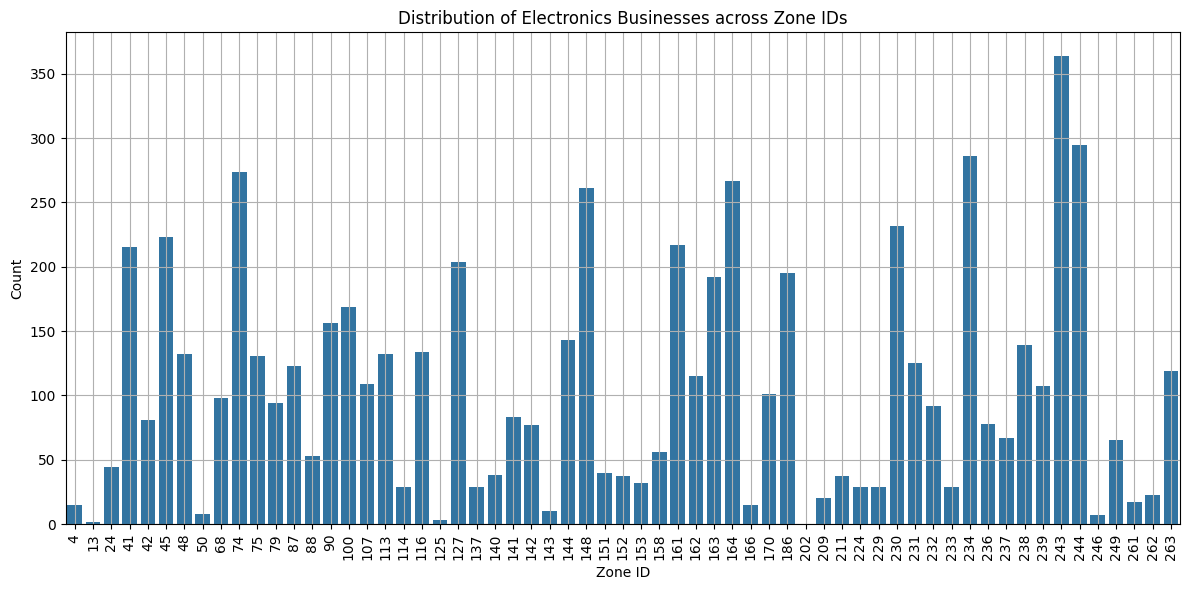

In [9]:
plot_business_distribution(merged_df, 'Electronics')

In [10]:
def calculate_score(data, business_type):
    #extract data for the specified business type
    counts = data[[business_type]]

    #apply min-max scaling and scale to range 0-100
    scaler = MinMaxScaler(feature_range=(0, 100))
    scaled_counts = scaler.fit_transform(counts)

    #create a DataFrame with the scaled scores
    scores_df = pd.DataFrame(scaled_counts, columns=['score'])
    scores_df['zone_id'] = data['zone_id']

    return scores_df


In [11]:
def calculate_percentile_rank(data, business_type):
    percentile_ranks = data[business_type].rank(pct=True) * 100
    return pd.DataFrame({'zone_id': data['zone_id'], 'rank': percentile_ranks})

In [12]:
e_ranks = calculate_percentile_rank(merged_df, 'Electronics')
e_ranks

,zone_id,rank
0,4,12.295082
1,13,3.278689
2,24,36.065574
3,41,85.245902
4,42,47.540984
...,...,...
56,246,6.557377
57,249,40.983607
58,261,14.754098
59,262,18.032787


In [13]:
e_scores = calculate_score(merged_df, 'Electronics')
e_scores

,score,zone_id
0,4.120879,4
1,0.549451,13
2,12.087912,24
3,59.065934,41
4,22.252747,42
...,...,...
56,1.923077,246
57,17.857143,249
58,4.670330,261
59,6.318681,262


In [14]:
def calc_all_ranks(data):
    results = pd.DataFrame(columns=['zone_id', 'business_type', 'score', 'rank'])

    for business_type in data.columns[1:]:
        scores_df = calculate_score(data, business_type)
        ranks_df = calculate_percentile_rank(data, business_type)

        combined_df = scores_df.merge(ranks_df, on='zone_id')
        combined_df['business_type'] = business_type
        combined_df = combined_df[['zone_id', 'business_type', 'score', 'rank']]
        results = pd.concat([results, combined_df], ignore_index=True)

    return results


In [15]:
business_score_ranks = calc_all_ranks(merged_df)
business_score_ranks

,zone_id,business_type,score,rank
0,4,"Food, beverages",4.332130,8.196721
1,13,"Food, beverages",7.942238,16.393443
2,24,"Food, beverages",8.844765,19.672131
3,41,"Food, beverages",36.101083,62.295082
4,42,"Food, beverages",8.483755,18.032787
...,...,...,...,...
666,246,Others,9.594756,19.672131
667,249,Others,29.261025,62.295082
668,261,Others,6.317044,11.475410
669,262,Others,17.699642,37.704918


In [16]:
# Function to plot the distribution of score or rank across locations for a given age group
def plot_distribution(data, business_type, metric='score'):
    subset = data[data['business_type'] == business_type]

    plt.figure(figsize=(15, 6))
    sns.barplot(x=subset['zone_id'], y=subset[metric])
    plt.title(f'Distribution of {metric} for {business_type} Across Locations')
    plt.xlabel('zone_id')
    plt.ylabel(metric)
    plt.xticks(rotation=90)
    plt.ylim(0, 100)
    plt.grid(True)
    plt.show()

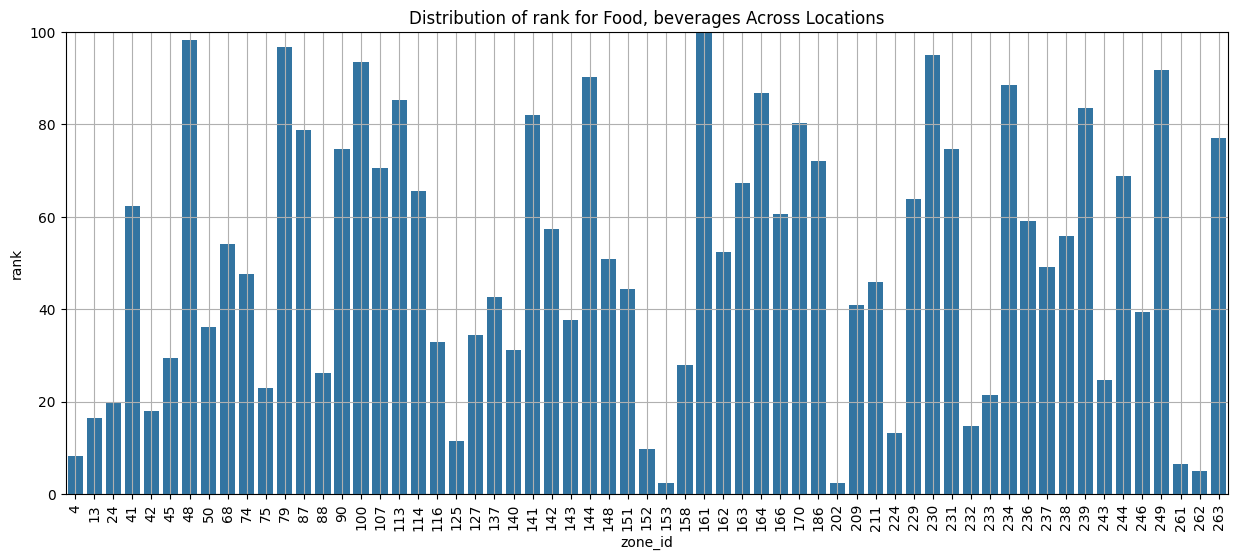

In [57]:
plot_distribution(business_score_ranks, 'Food, beverages', 'rank')

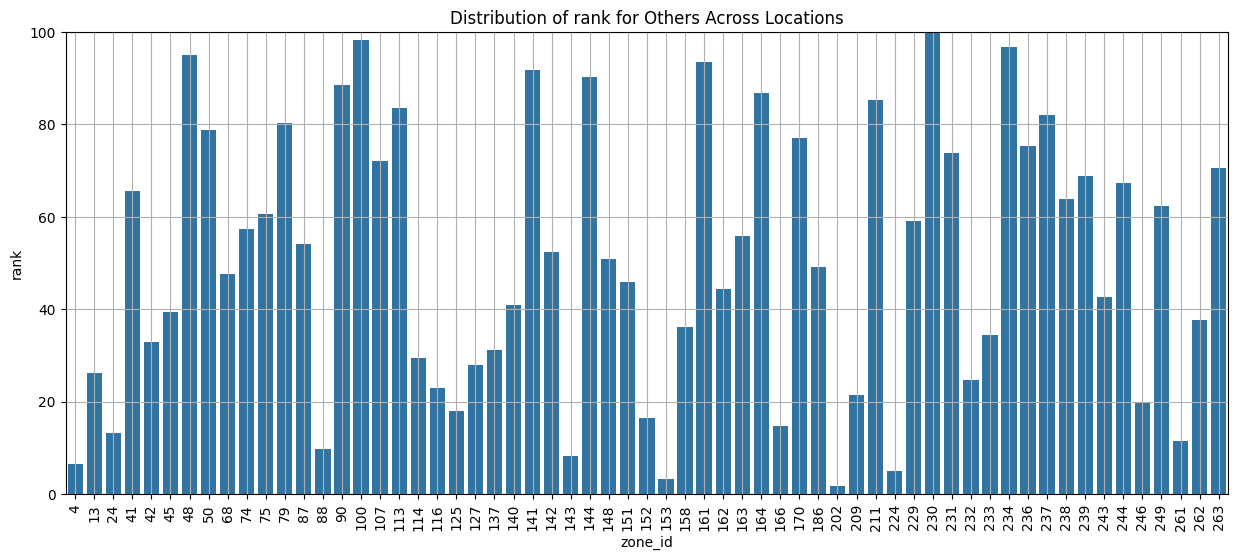

In [19]:
plot_distribution(business_score_ranks, 'Others', 'rank')

In [20]:
demo_df.head()

,gender,age_group,zone_id,score,rank
0,Male,Under 5 years,location_103,0.046795,5.223881
1,Male,Under 5 years,location_232,43.191390,82.089552
2,Male,Under 5 years,location_148,17.594759,48.507463
3,Male,Under 5 years,location_4,21.759476,61.194030
4,Male,Under 5 years,location_231,42.863828,80.597015


In [21]:
#remove location_ from zone_id
demo_df['zone_id'] = demo_df['zone_id'].str.replace('location_', '')

In [22]:
demo_df

,gender,age_group,zone_id,score,rank
0,Male,Under 5 years,103,0.046795,5.223881
1,Male,Under 5 years,232,43.191390,82.089552
2,Male,Under 5 years,148,17.594759,48.507463
3,Male,Under 5 years,4,21.759476,61.194030
4,Male,Under 5 years,231,42.863828,80.597015
...,...,...,...,...,...
3613,Male and Female,85 years and over,209,14.835729,41.791045
3614,Male and Female,85 years and over,12,0.000000,4.477612
3615,Male and Female,85 years and over,158,7.854209,28.358209
3616,Male and Female,85 years and over,128,0.000000,4.477612


In [23]:
#return rows with zone id 12
demo_df[demo_df['zone_id'] == 12]

,gender,age_group,zone_id,score,rank


In [24]:
demo_df.dtypes

gender        object
age_group     object
zone_id       object
score        float64
rank         float64
dtype: object

In [25]:
business_score_ranks.dtypes

zone_id           object
business_type     object
score            float64
rank             float64
dtype: object

In [26]:
#change zone id to int
business_score_ranks['zone_id'] = business_score_ranks['zone_id'].astype(int)
demo_df['zone_id'] = demo_df['zone_id'].astype(int)

In [62]:
def validate_selection(selection, valid_values, selection_name):
    # Special case for gender selection
    if selection_name == 'genders' and set(selection) == {'Male', 'Female', 'Male and Female'}:
        selection = ['Male and Female']

    invalid_values = [item for item in selection if item not in valid_values]
    if invalid_values:
        raise ValueError(f"Invalid {selection_name} values: {invalid_values}")

    return selection


# Function to calculate combined scores and ranks
def calculate_combined_scores_and_ranks(demographics_data, business_data, selected_genders, selected_age_groups, selected_businesses, demographic_weight=0.5, business_weight=0.5):
    """
    Calculate combined average scores and ranks for zones based on selected demographics and business types.

    Parameters:
    - demographics_data (pd.DataFrame): DataFrame containing demographic data with columns ['gender', 'age_group', 'zone_id', 'score', 'rank'].
    - business_data (pd.DataFrame): DataFrame containing business data with columns ['zone_id', 'business_type', 'score', 'rank'].
    - selected_genders (list of str): List of selected genders to filter the demographic data.
    - selected_age_groups (list of str): List of selected age groups to filter the demographic data.
    - selected_businesses (list of str): List of selected business types to filter the business data.
    - demographic_weight (float): Weight for the demographic score and rank in the final calculation. Must sum to 1 with business_weight.
    - business_weight (float): Weight for the business score and rank in the final calculation. Must sum to 1 with demographic_weight.

    Returns:
    - pd.DataFrame: DataFrame with combined average scores and ranks for each zone, with columns ['zone_id', 'average_score', 'average_rank'].

    Raises:
    - ValueError: If any of the selected genders, age groups, or business types are invalid or if the weights do not sum to 1.
    """

    if demographic_weight + business_weight != 1:
        raise ValueError("The sum of demographic_weight and business_weight must be 1.")

    # Validate user input.
    valid_genders = demographics_data['gender'].unique()
    selected_genders = validate_selection(selected_genders, valid_genders, 'genders')

    valid_age_groups = demographics_data['age_group'].unique()
    selected_age_groups = validate_selection(selected_age_groups, valid_age_groups, 'age groups')

    valid_business_types = business_data['business_type'].unique()
    selected_businesses = validate_selection(selected_businesses, valid_business_types, 'business types')

    # Filter demographics data
    filtered_demographics = demographics_data[(demographics_data['gender'].isin(selected_genders)) &
                                              (demographics_data['age_group'].isin(selected_age_groups))]

    # Calculate average demographic score and rank for each zone
    avg_demographic_scores = filtered_demographics.groupby('zone_id')['score'].mean().reset_index()
    avg_demographic_ranks = filtered_demographics.groupby('zone_id')['rank'].mean().reset_index()

    # Merge demographic scores and ranks
    combined_demographic_data = avg_demographic_scores.merge(avg_demographic_ranks, on='zone_id', suffixes=('_score', '_rank'))

    # Filter business data based on selected business types
    filtered_business_data = business_data[business_data['business_type'].isin(selected_businesses)]

    # Calculate average business score and rank for each zone
    avg_business_scores = filtered_business_data.groupby('zone_id')['score'].mean().reset_index()
    avg_business_ranks = filtered_business_data.groupby('zone_id')['rank'].mean().reset_index()

    # Merge business scores and ranks
    combined_business_data = avg_business_scores.merge(avg_business_ranks, on='zone_id', suffixes=('_score', '_rank'))

    # Merge demographic and business data
    combined_data = combined_demographic_data.merge(combined_business_data, on='zone_id', how='outer', suffixes=('_demographic', '_business'))

    # Fill NaN values with 0
    combined_data = combined_data.fillna(0)

    # Calculate final combined average score and rank for each zone with weights
    combined_data['final_avg_score'] = (combined_data['score_demographic'] * demographic_weight + combined_data['score_business'] * business_weight)
    combined_data['final_avg_rank'] = (combined_data['rank_demographic'] * demographic_weight + combined_data['rank_business'] * business_weight)

    # Select and rename columns
    result = combined_data[['zone_id', 'final_avg_score', 'final_avg_rank']]
    result = result.rename(columns={'final_avg_score': 'average_score', 'final_avg_rank': 'average_rank'})

    return result

In [64]:


# selected_genders = ['Female', 'Male']
# selected_age_groups = ['15 to 19 years', '20 to 24 years', '25 to 29 years']
# selected_businesses = ['Food, beverages', 'Electronics', 'Others']

# selected_genders = ['Female', 'Male']
# selected_age_groups = ['15 to 19 years']
# selected_businesses = ['Food, beverages']

final_results = calculate_combined_scores_and_ranks(demo_df, business_score_ranks, selected_genders, selected_age_groups, selected_businesses, demographic_weight=0.7, business_weight=0.3)

final_results

,zone_id,average_score,average_rank
0,4,18.360400,51.041106
1,12,0.000000,2.089552
2,13,8.726979,31.037436
3,24,11.763790,38.550893
4,41,43.061883,80.330316
...,...,...,...
62,246,9.779761,29.042085
63,249,29.454899,50.003670
64,261,2.787142,15.549303
65,262,18.043371,49.535111


In [65]:
final_results = calculate_combined_scores_and_ranks(demo_df, business_score_ranks, selected_genders, selected_age_groups, selected_businesses, demographic_weight=0.3, business_weight=0.7)

final_results

,zone_id,average_score,average_rank
0,4,10.344246,26.558600
1,12,0.000000,0.895522
2,13,8.278556,22.669440
3,24,10.095776,27.763029
4,41,39.084283,70.024468
...,...,...,...
62,246,15.434235,34.929043
63,249,58.317185,73.889161
64,261,3.051116,10.411059
65,262,9.073771,24.039638


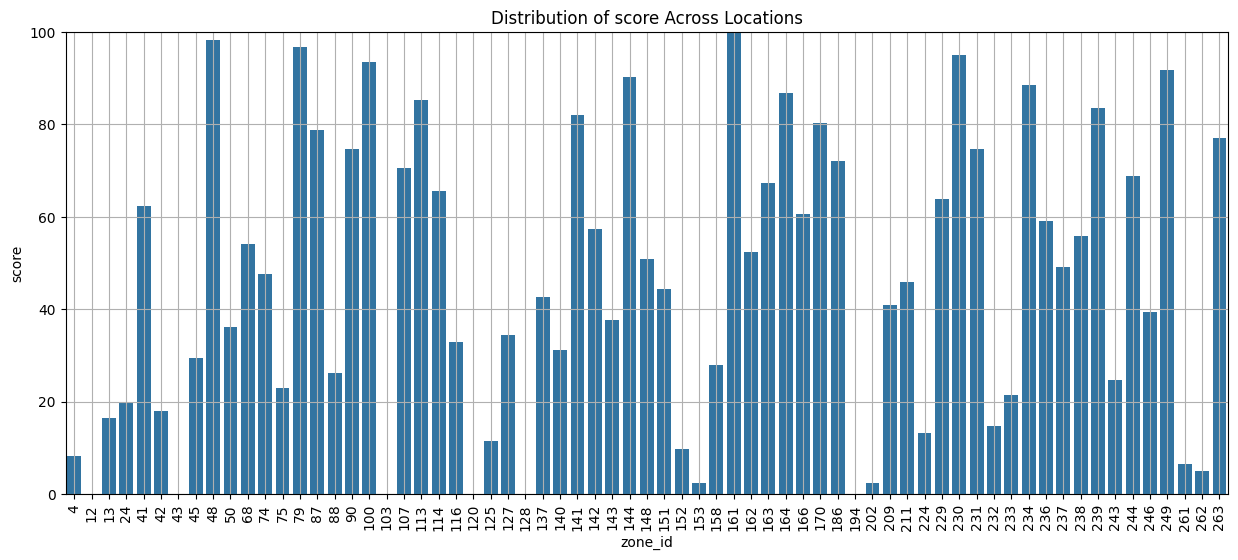

In [61]:
subset = final_results

plt.figure(figsize=(15, 6))
sns.barplot(x=subset['zone_id'], y=subset['average_rank'])
plt.title(f'Distribution of score Across Locations')
plt.xlabel('zone_id')
plt.ylabel('score')
plt.xticks(rotation=90)
plt.ylim(0, 100)
plt.grid(True)
plt.show()